# Project - topic 14 - Coin Toss Game

This script is the code that simulates the coin toss game in project topic #14.

**The script will:**

1. Define a funtion that will simulate a new game.
2. Determine how many games (the sapmle size) need to be simulated in order to get a reliable estimate of the number of cycles.
3. Simulate the game up to the number of times determined in step 2
4. Estimate the expected number of cycles that the game will last for by using the sample mean cycles.
5. Perform  further statistical analysis to determine the distribution of the number of cycles, empirical cumulative distribution function (CDF), and the confidence interval of the expected number of  cycles.

<br>

**This script include following sections:**
1. Import Packages
2. Define Functions
3. Determin Sample Size of the Simulation
4. Simulate the game
5. Statistical Analysis

## 1. Import Packages
The following packages are required to run this script successfully

In [1]:
import os
import sys
import random
import pandas as pd
import numpy as np
import math

import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt

import statistics
from statistics import mean
from statistics import stdev

from scipy import stats

from IPython.display import display

## 2. Define functions

**run_game** - this function will run a new coin toss game. The number of cycles will be returned.

<br>
Definitions of some Key variables used in the function **run_game**:

1. **cycle** - the number of cycles that the current game has went through
2. **i** - iteration variable
3. **A_coin** - the number of coins that player A has
4. **B_coin** - the number of coins that player B has
5. **pot_coin** - the number of coins in the pot
6. **game_over** - a boolean variable that indicates if the game is over
7. **toss** - the number a player obtained after tossing the dice

In [2]:
def run_game():
    
    #---------------- initialize the game ----------------------#
    A_coin = 4
    B_coin = 4
    pot_coin = 2
    cycle = 0
    game_over = False
    
    #------------------------ play the game until one player wins -------------------#
    while game_over == False:
        
        #--------------------------------- start a new cycle ------------------------------------------#
        cycle = cycle + 1
        #print("Round:", cycle)
        
        #------------ Player A tosses the dice first, obtaining an integer from 0 to 6 ----------------#
        toss = math.ceil(random.uniform(0, 6))
        #print("A toss: ", toss)
        
        #------------------------------ Player A performs his activities ------------------------------#
        if toss == 2:
            A_coin = A_coin + pot_coin
            pot_coin = 0
        elif toss == 3:
            A_coin = A_coin + math.floor(pot_coin / 2)
            pot_coin = pot_coin - math.floor(pot_coin / 2)
        elif (toss >= 4):
            if A_coin == 0:
                game_over = True
                break
            else:
                A_coin = A_coin - 1
                pot_coin = pot_coin + 1
        #print(A_coin, B_coin, pot_coin)
        
        #------------------ Player B tosses the dice, obtaining an integer from 0 to 6 ---------------#
        toss = math.ceil(random.uniform(0, 6))
        #print("B toss: ", toss)
        
        #-------------------------------- Player B performs his activities ---------------------------#
        if toss == 2:
            B_coin = B_coin + pot_coin
            pot_coin = 0
        elif toss == 3:
            B_coin = B_coin + math.floor(pot_coin / 2)
            pot_coin = pot_coin - math.floor(pot_coin / 2)
        elif (toss >= 4):
            if B_coin == 0:
                game_over = True
                break
            else:
                B_coin = B_coin - 1
                pot_coin = pot_coin + 1
        #print(A_coin, B_coin, pot_coin)
        #print("------------------------")
    
    return cycle
        

## 3. Determin Sample Size of the Simulation

<br>
Definitions of some Key variables used in this section:

1. **sample sizes** - differnet levels of sample size to compare
2. **trial** - number of simulations to run at each sample size level. This variable is set to be 40.
3. **cycle** - a list that stores the number of cycles of each simulation. This list will be cleared out after each 40 trials at each sample size level.
3. **sample_size_list** - a list that stores the sample size that we have tried.
4. **cycle_mean_list** - a list that stores the mean number of cycles for each 40 trial at every sample size level.
5. **cycle_mean_df** - this dataframes merges **cycle_mean_list** and **sample_size_list** into one table at each sample size level.
6. **cycle_mean_df_list** - a list that containes **cycle_mean_df** at each sample size level
7. **cycle_mean_df_merged** - a table that concatenate all the dataframes in **cycle_mean_df_list**. This table contains the mean number of cycles for each 40 trials at each level of sample size.

In [3]:
#--------------- Define the sample sizes to try; Try each sample size with 40 simulations ------------------#
sample_sizes = [10,100, 1000, 10000, 100000, 1000000]
trial = 40

#-------------- The mean of cycles of all the trials will be stored in the following lists ---------------#
cycle_mean_df_list = []

Run the coin toss game at each sample size level defined in the last step; <br>
Run the coin toss game multiple times up to the sample size; <br>
Repeat the same process 40 times for each sample size; <br>
Record the mean of number of cycles for each trial

In [4]:
#-------------- Try to run the simulation at different level of sample size -------------------#
for sample_size in sample_sizes:
    
    cycle_list = []
    sample_size_list = []
    cycle_mean_list = []
    
    #-------------- repeat 40 (trial = 40) times at each sample size level ----------------------# 
    for i in range(trial):
        cycle_list = []
        
        #------------- simulate new games and keep records of the number of cycles -----------------#
        for j in range(sample_size):
            cycle = run_game()
            cycle_list += [cycle]
            ##print(cycle)
        
        #------------------------ calculate mean number of cycles --------------------#
        cycle_mean = mean(cycle_list) 
        sample_size_list += [sample_size]
        cycle_mean_list += [cycle_mean]
    
    cycle_mean_df = pd.DataFrame({"sample size": sample_size_list,
                                  "mean number of cycles": cycle_mean_list}) 
    cycle_mean_df_list += [cycle_mean_df]

cycle_mean_df_merged = pd.concat(cycle_mean_df_list).reset_index(drop = True)
display(cycle_mean_df_merged)

,sample size,mean number of cycles
0,10,15.800000
1,10,29.800000
2,10,14.700000
3,10,16.900000
4,10,18.900000
...,...,...
235,1000000,17.514543
236,1000000,17.543208
237,1000000,17.526705
238,1000000,17.533790


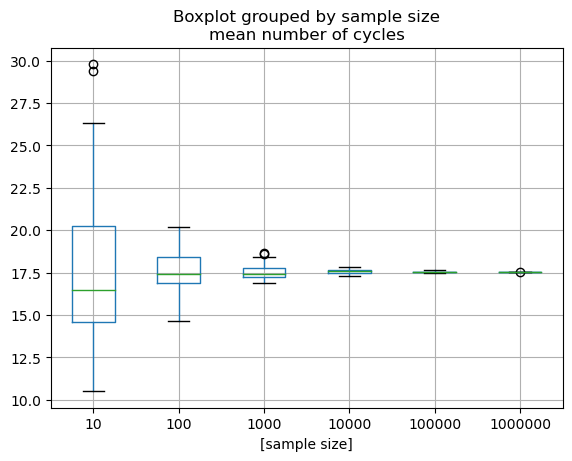

In [5]:
# display boxplot - the distribution of mean number of cycle for each sample size
boxplot = cycle_mean_df_merged.boxplot(column=['mean number of cycles'], by=['sample size'])

In [6]:
#Display the sample standard deviation of mean number of cycles at each sample size level
pd.DataFrame(cycle_mean_df_merged.groupby(['sample size'])['mean number of cycles'].std()
                                 .reset_index()
                                 .rename(columns = {"mean number of cycles": "sample standard deviation"}))

,sample size,sample standard deviation
0,10,4.611023
1,100,1.244432
2,1000,0.439836
3,10000,0.145223
4,100000,0.039339
5,1000000,0.011675


## 4. Simulate the game

Definitions of some Key variables used in the Main program:
1. **ngames** - number of games to simulate
2. **cycle** - the number of cycles of each game simulation
3. **cycle_list** - a list that stores the number of cycles of all the simulations
4. **cycle_df** - a pandas dataframe that stores the same data as **cycle_list**
5. **cycle_mean** - mean of the number of cycles of all simulations
6. **cycle_stdev** - standard deviation of the number of cycles of allsimulations
7. **i** - iteration variable

**Initialize the program** <br>
From the previous step, the sample standard deviation is around 0.01 at sample size of 1,000,000.
This is good enough to generate a reliable estimate. Therefore, we are going to estimate the number of cycles of a game by simulating 1,000,000 games.

In [7]:
#--------------- Define the number of games to run ------------------#
ngames = 1000000

#--------- The number of cycles of all the simulations will be stored in the following list ---------#
cycle_list = []

**Run the coin toss games up to the number of times defined in the last step**

In [8]:
#------------------- simulate 1,000,000 games (ggame = 1,000,000) -------------------------#
for i in range(ngames):
    
    #------------- simulate a new game and keep a record of the number of cycles -----------------#
    cycle = run_game()
    cycle_list += [cycle]
    ##print(cycle)

## 5. Statistical Analysis

**Print the simulation results and descriptive statics**

In [9]:
#----------------- convert cycle_list into a column of a pandas data frame ---------------#
cycle_df = pd.DataFrame({'cycle': cycle_list})
##display(cycle_df)

#---------------- display mean and standard deviation of the results ---------------------#
cycle_mean = mean(cycle_df['cycle'])
cycle_stdev = stdev(cycle_df['cycle'])
print("Mean of the number of cycles: ", round(cycle_mean, 4))
print("Standard Deviation of the number of cycles: ", round(cycle_stdev, 4))

display(round(cycle_df.describe()
                      .rename(columns = {"cycle": "Descriptive Statistics"}), 2))

Mean of the number of cycles:  17.5504
Standard Deviation of the number of cycles:  12.7825


,Descriptive Statistics
count,1000000.00
mean,17.55
std,12.78
min,5.00
25%,8.00
50%,14.00
75%,23.00
max,226.00


**Calculate the 95% confidence interval (two sided) of the mean numberof cycles** 

In [10]:
#---retrieve the z-score of normal distribution to calculate the 95% confidence interval (two-sided) of the number of cycles-----#
z_score = stats.norm.ppf(.975)
print("z score of 95% confidence interval: ", round(z_score, 5))

z score of 95% confidence interval:  1.95996


The 95% confidence interval of the number of cycles shoud be: <br>
$$
(\bar{X_{n}} - Z \times \frac{\hat{\sigma}}{\sqrt{n}}  ,  \bar{X_{n}} + Z \times \frac{\hat{\sigma}}{\sqrt{n}})
$$

where $\bar{X_{n}}$ represents sample mean of the number of cycle of all the simulated games; $\hat{\sigma}$ represents the sample standard deviation of mean number of cycles; $n$ represents the sample size which equals 1,000,000.

In [11]:
#--------------- calculate 95% confidence interval -----------------------#
print("The 95% confidence interval (two-sided) of the number of cycles is (",
      round(cycle_mean - z_score * cycle_stdev / math.sqrt(ngames), 5), ",",
      round(cycle_mean + z_score * cycle_stdev / math.sqrt(ngames), 5), ")")

The 95% confidence interval (two-sided) of the number of cycles is ( 17.52533 , 17.57543 )


**Print out the histogram of the number of cycles**

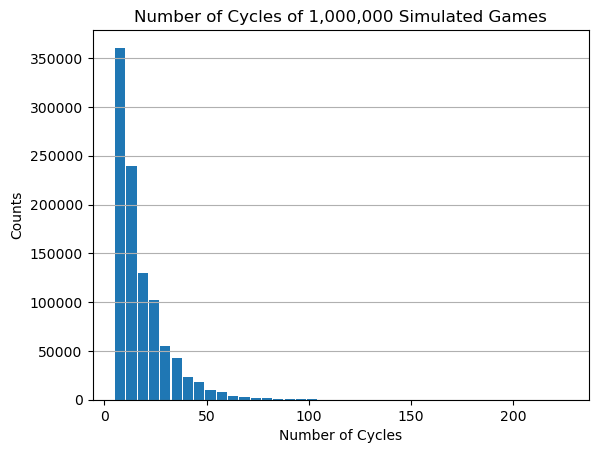

In [12]:
#------------------- Print the histogram of the number of cycles ------------------------#
cycle_df['cycle'].plot.hist(grid = True, bins = 40, rwidth = 0.9,)
plt.title('Number of Cycles of 1,000,000 Simulated Games')
plt.ylabel('Counts')
plt.xlabel('Number of Cycles')
plt.grid(axis = 'x')

**Generate empirical cumulative distribution function (CDF)**

[0.061575 0.061575 0.061575 ... 0.999999 0.999999 1.      ]


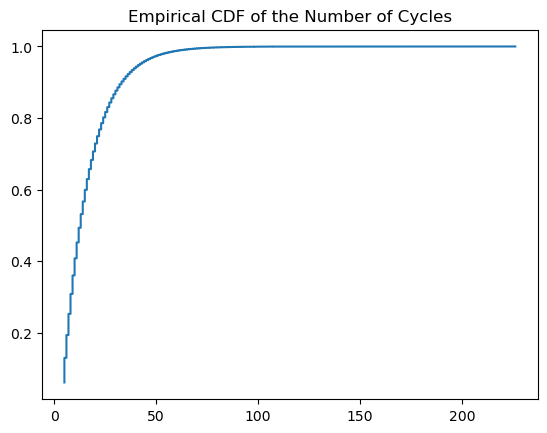

In [13]:
cycle_list.sort()

ecdf = sm.distributions.ECDF(cycle_list)

empirical_cdf = ecdf(cycle_list)
print(empirical_cdf)


#-------------------------- print empirical CDF in a line chart ------------------------#
plt.step(cycle_list, empirical_cdf)
plt.title('Empirical CDF of the Number of Cycles')
plt.show()